In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from detector_config import detectors
import detector as de
from particle import Particle
import fit_utils
import data_io
import evaluation
from plot_config import *

68
Total price is within budget: 2183


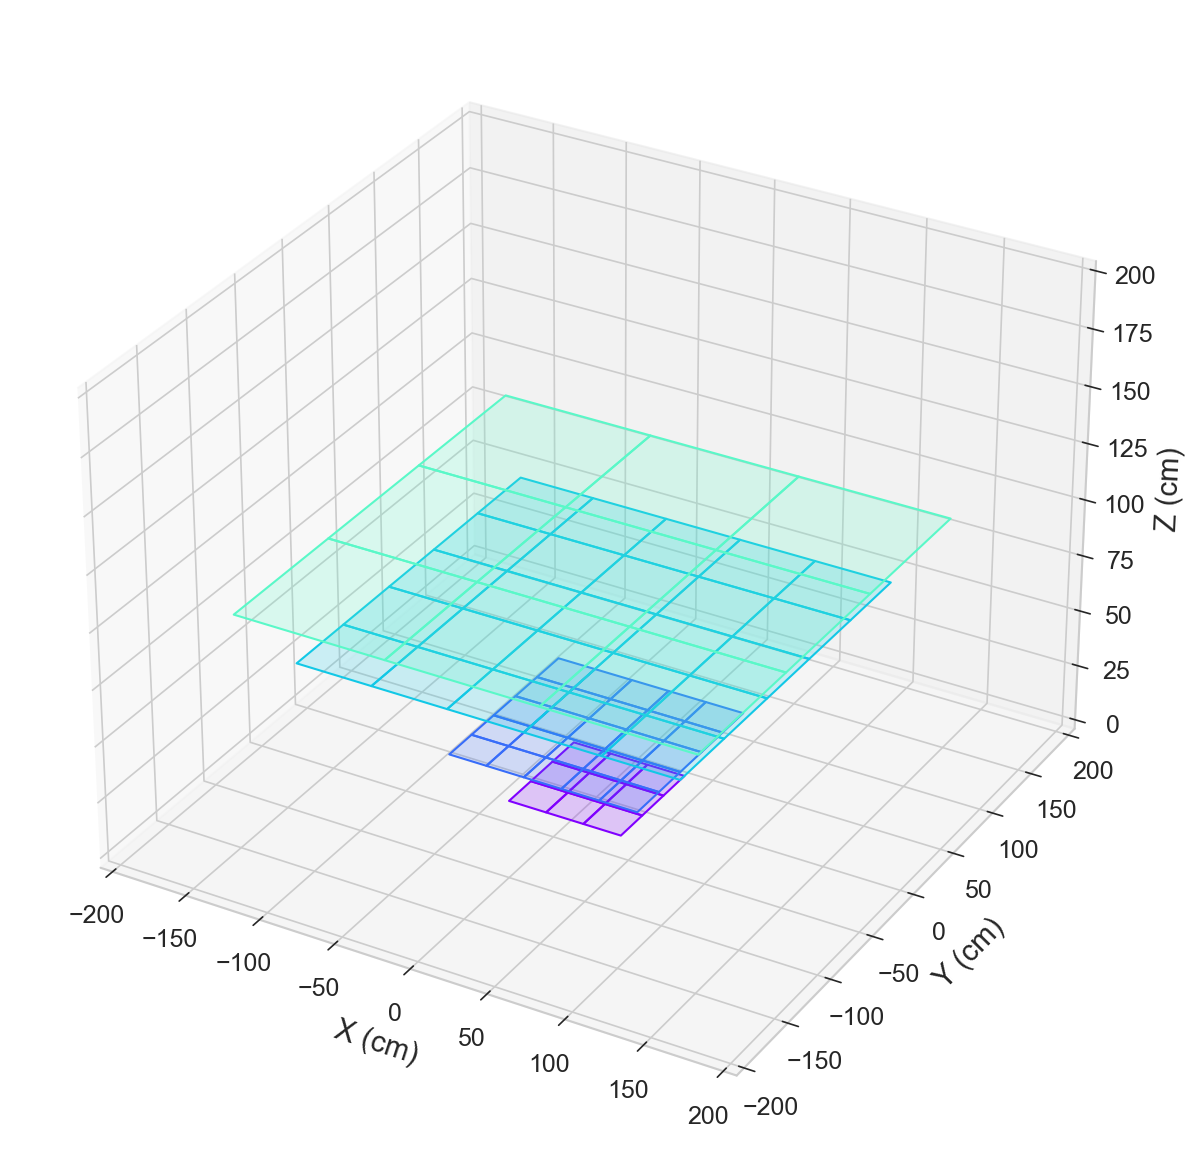

In [2]:
print(len(detectors))

# Cost
de.Get_Price(detectors)

# Draw detectors
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

for d in detectors:
    z = d.position[2]
    color = get_color_by_z(z)
    d.plot(ax, color=color)

plt.show()

In [5]:
# Particle Setting
P1 = Particle()
print(f"direction: {P1.direction}")

hit_detectors = [d for d in detectors if d.is_hit(P1)]

print(f"Particle go throuth {len(hit_detectors)} Detector")
for d in hit_detectors:
    print(f"Center of Detector: {d.position}, lenth: {d.size}")

direction: [ 0.26548384 -0.75847193  0.59517952]
Particle go throuth 4 Detector
Center of Detector: (0, 0, 0), lenth: 25
Center of Detector: (0, -25, 25), lenth: 25
Center of Detector: (50, -100, 75), lenth: 50
Center of Detector: (0, -100, 100), lenth: 100


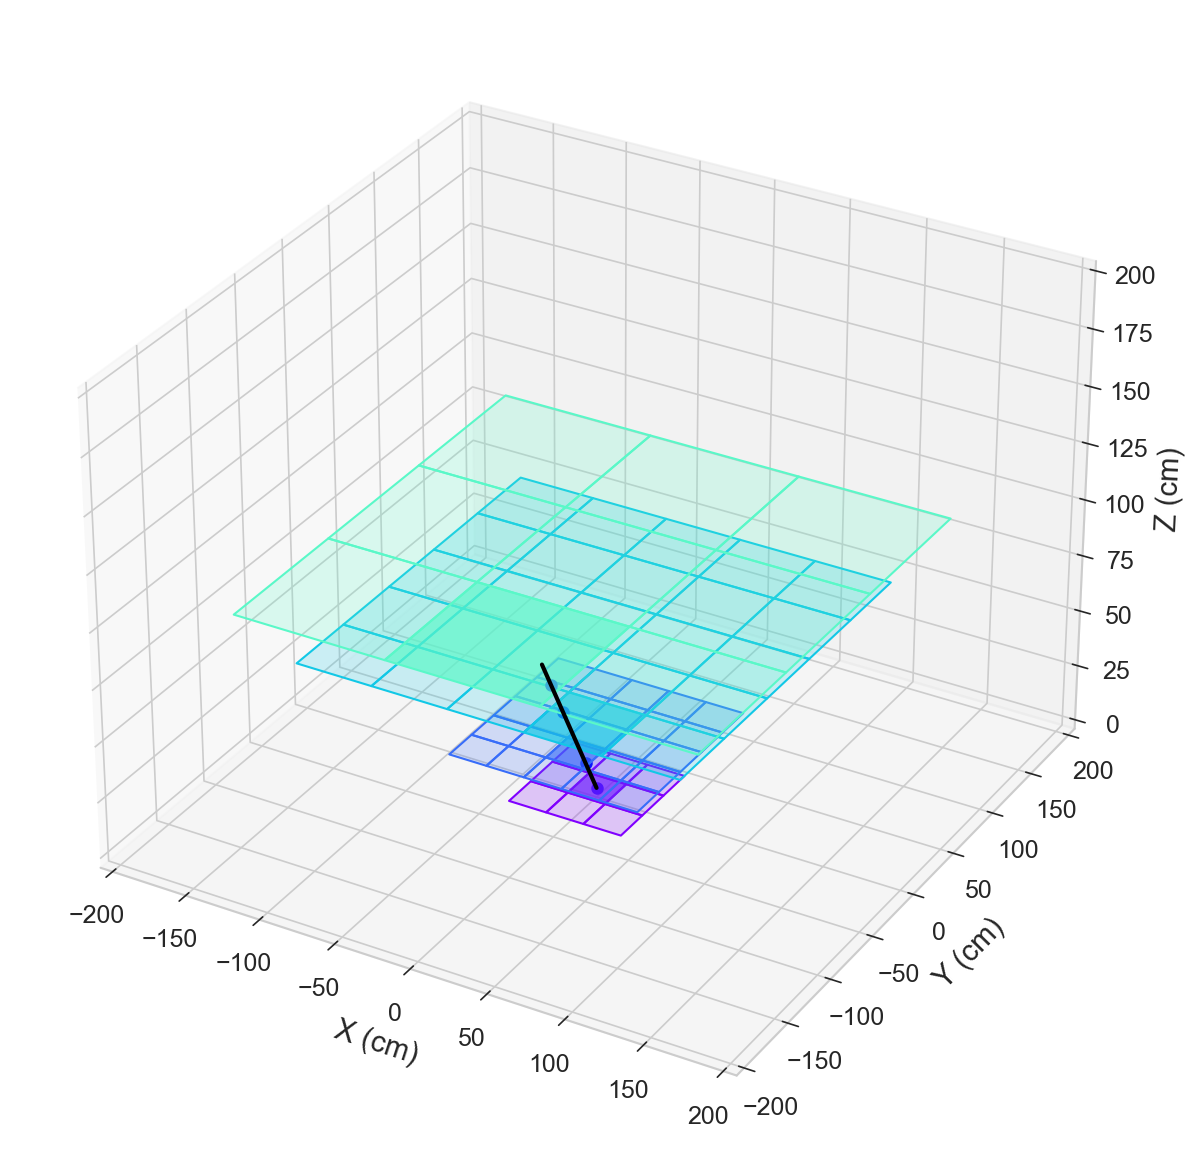

In [6]:
# Draw detectors and particle track
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

for d in detectors:
    z = d.position[2]
    color = get_color_by_z(z)
    if d in hit_detectors:
        pass
    else:
        d.plot(ax, color=color)


for d in hit_detectors:
    z = d.position[2]
    color = get_color_by_z(z)
    d.plot(ax, color=color)
    d.interaction_point(ax, P1)

Final_Point = P1.position_t(200)
# set high zorder value to make the track line drawn on top of all Detector Module
ax.plot([P1.position[0], Final_Point[0]], [P1.position[1],Final_Point[1]],[P1.position[2],Final_Point[2]], color="black", zorder=999)
plt.show()

In [7]:
data_io.save_detected_data(detectors, P1)
data_io.save_truth_data(detectors, P1)

-----

Detector 0 Center: (0, 0, 0) vs. Truth Particle (0.0, 0.0, 0.0)
Detector 1 Center: (0, -25, 25) vs. Truth Particle (11.151418698719665, -31.85895665123717, 25.0)
Detector 2 Center: (50, -100, 75) vs. Truth Particle (33.45425609615899, -95.5768699537115, 75.0)
Detector 3 Center: (0, -100, 100) vs. Truth Particle (44.60567479487866, -127.43582660494867, 100.0)


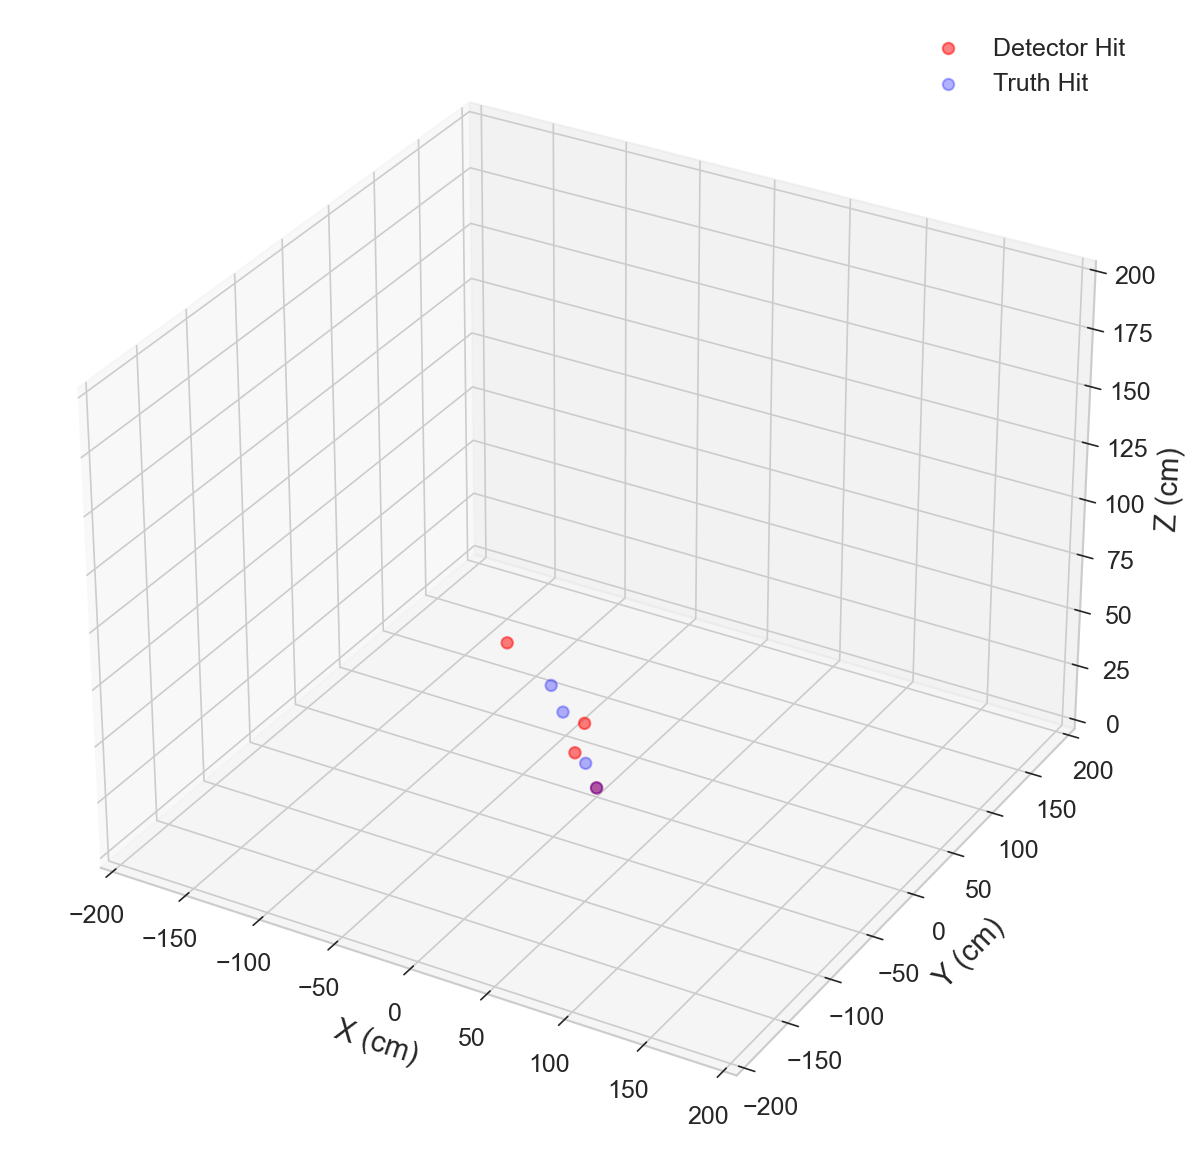

In [8]:
# Read detector data and scatter
detector_data = pd.read_csv('data/detectors.csv')
truth_data = pd.read_csv('data/particle.csv')

points = detector_data[['x', 'y', 'z']].values
track = truth_data[['x', 'y', 'z']].values
x, y, z = points.T
tx, ty, tz = track.T

for i in range(len(x)):
    print(f"Detector {i} Center: ({x[i]}, {y[i]}, {z[i]}) vs. Truth Particle ({tx[i]}, {ty[i]}, {tz[i]})")


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

ax.scatter(x, y, z, c='r', s=30, label='Detector Hit', marker='o', alpha=0.5)
ax.scatter(tx, ty, tz, c='b', s=30, label='Truth Hit', marker='o', alpha=0.3)


plt.legend()
plt.show()

Direction: [ 0.19176162 -0.74026653  0.64438571]
Initial point: [-2.37941295  1.18970648  0.        ]
Angular Deviation: 0.09051654370743167
RMSE: 14.523852614010675


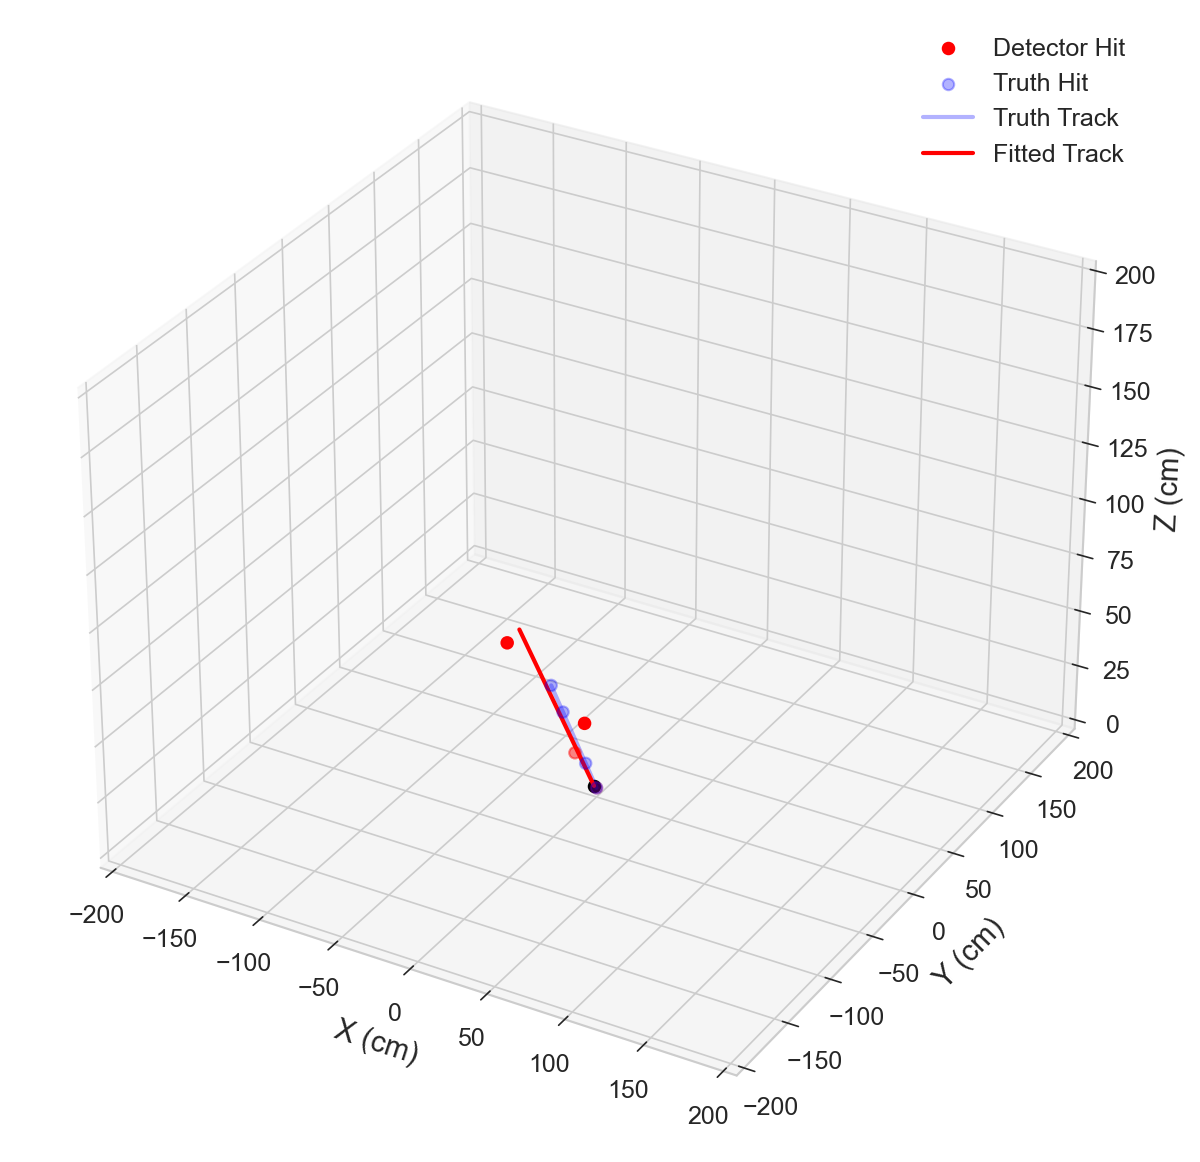

In [9]:
centroid, direction, init_point = fit_utils.PCA_Fit(points)

t_vals = np.linspace(0, 200, 200)
line_points = init_point  + t_vals[:, np.newaxis] * direction


print(f"Direction: {direction}")
print(f"Initial point: {init_point}")

evaluation.angular_deviation(P1.direction, direction)
evaluation.compute_rmse(track, evaluation.get_points(detectors, centroid, direction))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

ax.scatter(x, y, z, c='r', s=30, label='Detector Hit', marker='o')
ax.scatter(tx, ty, tz, c='b', s=30, label='Truth Hit', marker='o', alpha=0.3)
ax.plot(tx, ty, tz, c='b', label='Truth Track', alpha=0.3)
ax.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2], c='r', label='Fitted Track')
ax.scatter(init_point[0], init_point[1], init_point[2], c='black', s=30)

ax.legend()
plt.show()

Direction: [ 0.09701425 -0.72760688  0.67909975]
Initial Point: [ 5.35714286 -2.67857143  0.        ]
Angular Deviation: 0.1910185163585032
RMSE: 18.969724463123455


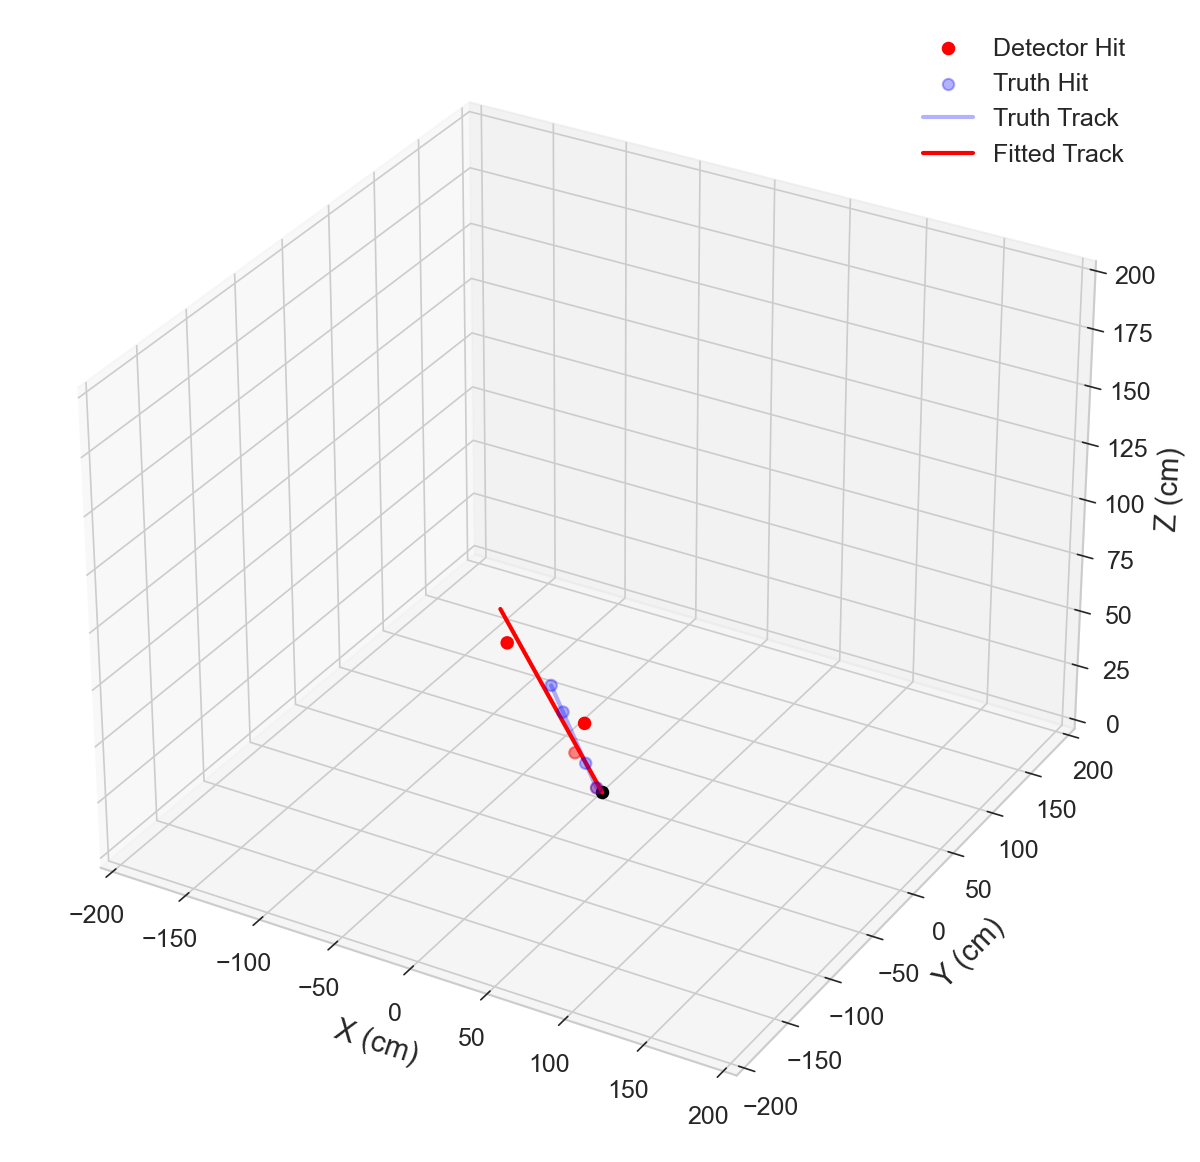

In [10]:
initial, direction, init_point = fit_utils.Linear_Fit(points)

t_vals = np.linspace(0, 200, 100)
line_points = init_point + t_vals[:, np.newaxis] * direction

print(f"Direction: {direction}")
print(f"Initial Point: {init_point}")

evaluation.angular_deviation(P1.direction, direction)
evaluation.compute_rmse(track, evaluation.get_points(detectors, initial, direction))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

ax.scatter(x, y, z, c='r', s=30, label='Detector Hit', marker='o')
ax.scatter(tx, ty, tz, c='b', s=30, label='Truth Hit', marker='o', alpha=0.3)
ax.plot(tx, ty, tz, c='b', label='Truth Track', alpha=0.3)
ax.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2], c='r', label='Fitted Track')
ax.scatter(init_point[0], init_point[1], init_point[2], c='black', s=30)

ax.legend()
plt.show()